<img src='https://sites.google.com/site/briantaylorca/photos/pics/title.jpg'>

### An examination of baseball data

Brian Taylor<br>
February 2016

### Sources & References
For this assignment I used baseball data downloaded from the [Sean Lahman Baseball Database](http://www.seanlahman.com/baseball-archive/statistics).

I took the photo (above) of Mariano Rivera on June 9, 2013 in Seattle.

Books that I consulted:
* Learning IPython for Interactive Computing and Data Visualization - Second Edition by Cyrille Rossant (Packt Publishing)
* IPython Interactive Computing and Visualization Cookbook by Cyrille Rossant (Packt Publishing)
* Learning pandas by Michael Heydt (Packt Publishing)
* Data Analysis with Python and Pandas by Stone River eLearning (Stone River eLearning)

In this project I have had some fun exploring the data, learning some of the tools and trying out some of the lessons that I've learned. I haven't attempted to make this a polished (or concise!) report. I simply let my curiosity guide me. The database is such a rich source that there were many more relationships that I didn't have time to explore.

Each of the following seven questions could lead to much deeper analysis. I feel I have only skimmed the surface with each one.

In [283]:
# import pandas, numpy, seaborn, matplotlib and statsmodels
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm

# inline graphics
%matplotlib inline

In [284]:
master = pd.read_csv('./lahman-csv_2015-01-24/Master.csv')

## The Relative Age Effect
#### Question 1 - Do baseball player data exhibit the Relative Age Effect?
I was curious to see if the [relative age effect](https://en.wikipedia.org/wiki/Relative_age_effect) was present in the data. In other words, are players born earlier in the year over-represented. But, as the histogram below shows it looks like, if anything, players born in the late summer and early fall are over-represented.

(0, 2000)

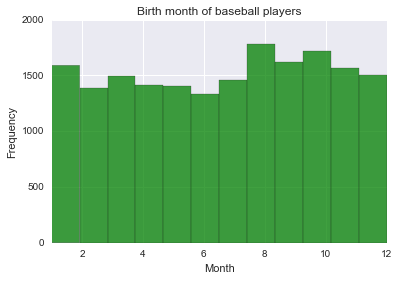

In [285]:
g = master.birthMonth.hist(bins=12, facecolor='green', alpha=0.75)
g.set_title('Birth month of baseball players')
g.set_xlabel('Month')
g.set_ylabel('Frequency')
g.set_xlim(1, 12)
g.set_ylim(0, 2000)

I wanted to take a look at the data decade by decade to see if perhaps a relative age effect became apparent in a certain decade, but the following histograms seem to show a fair level of randomness with a possible 'bump' in late summer and early fall in some decades. 

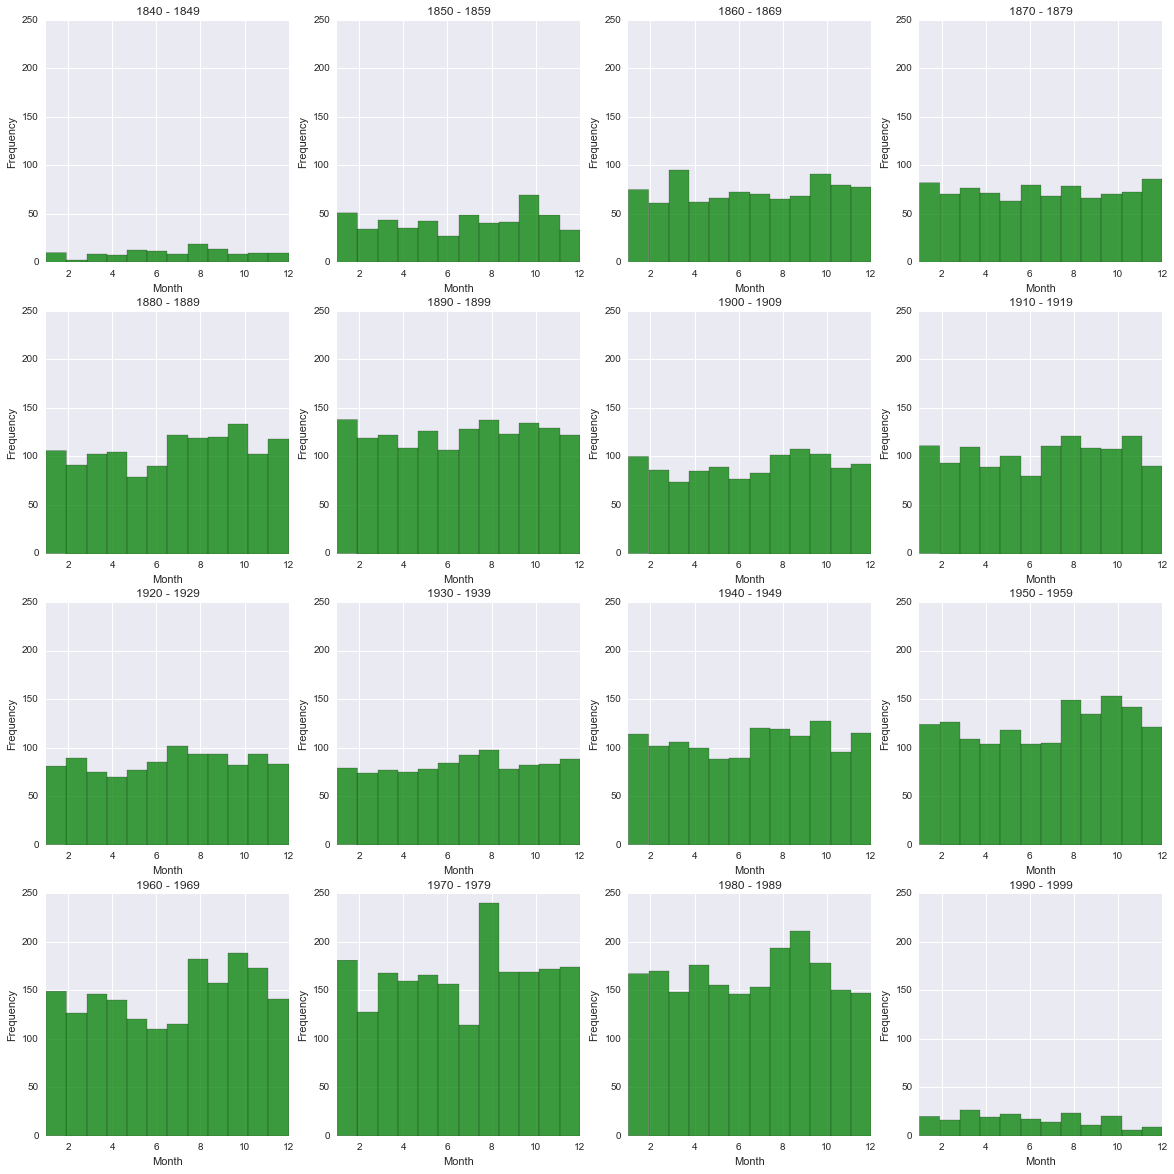

In [286]:
fig = plt.figure(figsize=(20,20))

for i in range(1,17):
    year = 1830 + 10*i
    months = master[master.birthYear >= year]
    months = months[months.birthYear < year + 10]
    
    h = fig.add_subplot(4,4,i)
    h = months.birthMonth.hist(bins=12, facecolor='green', alpha=0.75)
    h.set_title(str(year) + " - " + str(year+9))
    h.set_xlabel('Month')
    h.set_ylabel('Frequency')
    h.set_xlim(1, 12)
    h.set_ylim(0, 250)

#### Limitations and further study
In order to fully explore this topic I would have to obtain data on births by month. I could use US census data, but then I would have to limit the baseball players to US born. Assuming I had all the necessary data I'm not sure exactly what statistical test I would have to perform in order to claim that the distribution of birthdays of baseball players was significantly different from the distribution of birthdays of the general population.

## Lifespan
#### Question 2 - Are baseball players living longer than they used to?
I wanted to get an idea if players are living longer, so I created separate columns for date of birth, date of death and then calculated lifespan in days. I then created the scatterplot below and immediately realized I would have a bit of a problem if I ran a regression. Since younger players are still alive they don't show up (not having a date of death) and recent deaths would skew the data to shorter lifespans. Nevertheless, even without running a regression it's possible to see an upward trend, with far fewer players dying before 20,000 days (54.75 years).

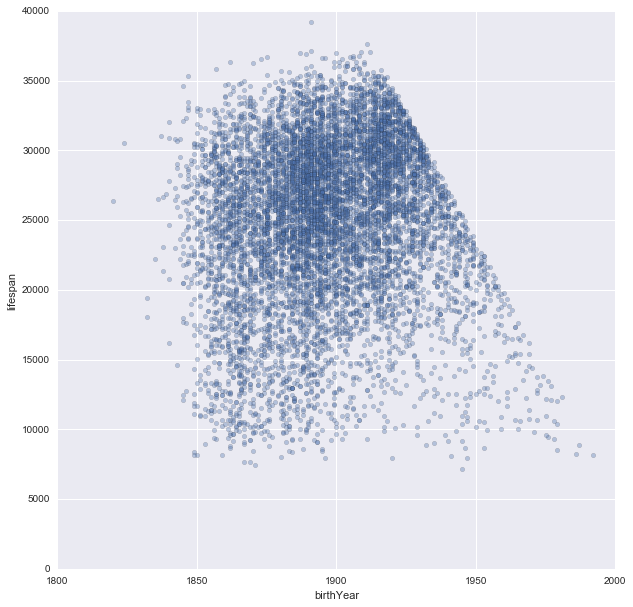

In [287]:
master['dateOfBirth'] = pd.to_datetime(master.birthYear*10000 + master.birthMonth*100 + master.birthDay, format='%Y%m%d')
master['dateOfDeath'] = pd.to_datetime(master.deathYear*10000 + master.deathMonth*100 + master.deathDay, format='%Y%m%d')
master['lifespan'] = (master.dateOfDeath - master.dateOfBirth).dt.days

master.plot(kind='scatter', x='birthYear', y='lifespan', alpha=0.35, xlim=(1800,2000), ylim=(0,40000), figsize=(10,10))

#### Limitations and further study
In order to deal with the problem of not being able to look at the complete lifespan of most of the players in the database I could have looked at the proportion of players born in any given year who lived to 10,000 days, 15,000 days, etc. and compared the survival rates over time.

## Height
#### Question 3 - Are baseball players getting taller?
Next I wanted to see if baseball players are getting taller over time. The following scatter plot shows height (in inches) vs. year of birth. The dot at the bottom of the graph is not a mistake. It refers to [Eddie Gaedel](https://en.wikipedia.org/wiki/Eddie_Gaedel), who appeared in one game for the St. Louis Browns on August 9, 1951. He was only 43 inches tall. He was walked on four pitches. The plot below (made using Seaborn) has a regression line clearly showing an upward trend.

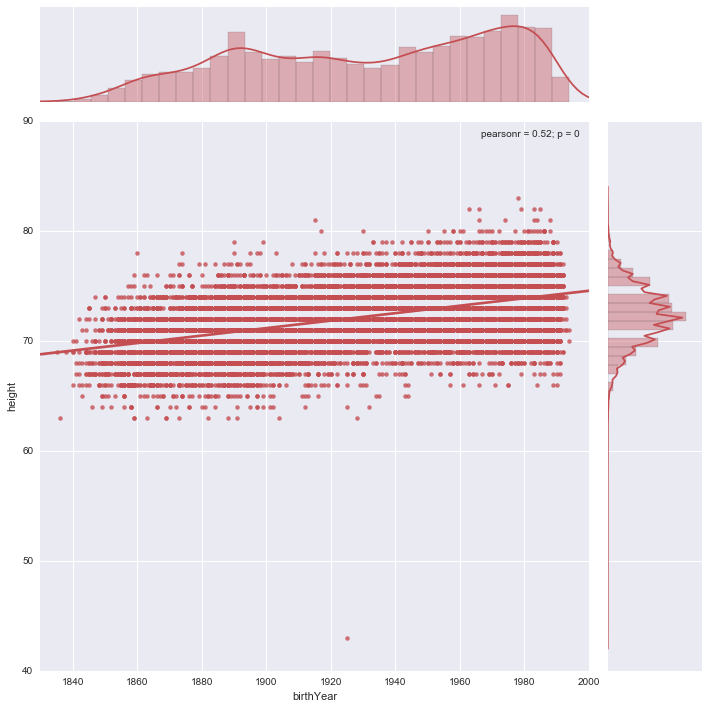

In [288]:
sb.set(style="darkgrid", color_codes=True)
sb.jointplot("birthYear", "height", data=master, kind="reg",
                  xlim=(1830, 2000), ylim=(40, 90), color="r", size=10)

Based on the regression below it appears that the height of an average player has been increasing by about 0.034 inches per year, or about one inch every 30 years. The standard error and the p-value are very small, but given that the independent variable is time I'm not confident that I can deal with the parameters in the normal way.

In [289]:
from scipy import stats

masterclean = master.dropna(subset=['birthYear', 'height'])
x = masterclean.birthYear
y = masterclean.height

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print "slope:", slope
print "intercept:", intercept
print "p value:", p_value
print "std. error:", std_err
print "r-value:", r_value
print "r-squared:", r_value**2

slope: 0.0339245905863
intercept: 6.68523061292
p value: 0.0
std. error: 0.000421872055852
r-value: 0.516630169857
r-squared: 0.266906732406


#### Limitations and further study
I would be interested to see the data on the heights of all men over the same time period and then compare it to baseball players. I would imagine that increases have been seen in the general population, too, due to better nutrition.

## Salaries
#### Question 4 - Just how much more money do players make today?
I took a look at some of the salary data. Clearly the salaries have been growing rapidly. I tried a couple of different graphs to get a feel for the growth. The highly skewed nature of the distribution of salaries makes it a bit difficult to work with visually.

In [290]:
salary = pd.read_csv('./lahman-csv_2015-01-24/Salaries.csv')
salary.describe()

             yearID           salary
count  24758.000000     24758.000000
mean    1999.891752   1932904.790169
std        8.324492   3190333.601862
min     1985.000000         0.000000
25%     1993.000000    260000.000000
50%     2000.000000    525000.000000
75%     2007.000000   2199643.000000
max     2014.000000  33000000.000000

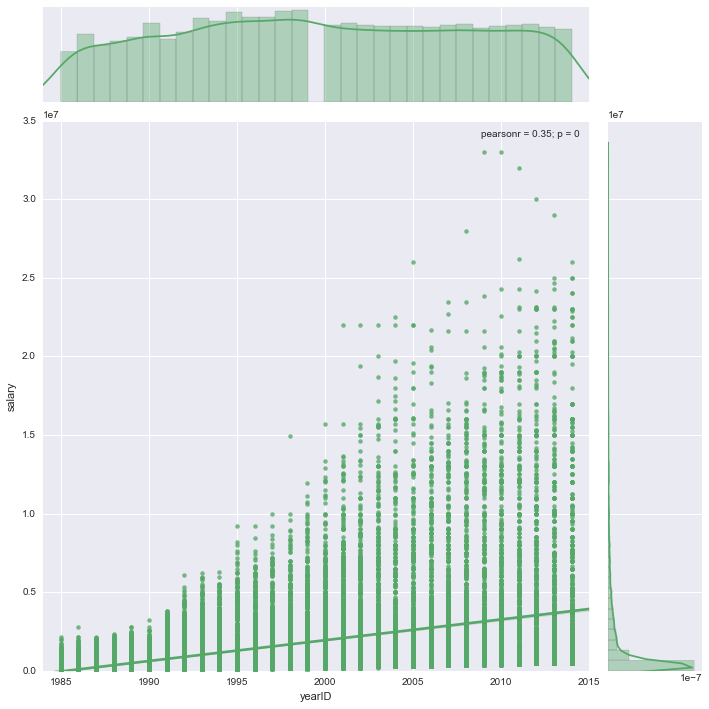

In [291]:
sb.set(style="darkgrid", color_codes=True)
sb.jointplot("yearID", "salary", data=salary, kind="reg",
                  xlim=(1984, 2015),  ylim=(0, 35000000), color="g", size=10)

The mean salary has increased from \$476,299 in 1985 to \$3,980,445 in 2014, and over the same time period the median salary has gone from \$400,000 to \$1,500,000.

In [292]:
salary.groupby('yearID').agg(np.mean)

         salary
yearID         
1985     476299
1986     417147
1987     434729
1988     453171
1989     506323
...         ...
2010    3278746
2011    3318838
2012    3458421
2013    3723344
2014    3980445

[30 rows x 1 columns]

In [293]:
salary.groupby('yearID').agg(np.median)

         salary
yearID         
1985     400000
1986     294404
1987     285000
1988     295000
1989     300000
...         ...
2010    1093750
2011    1200000
2012    1100000
2013    1350000
2014    1500000

[30 rows x 1 columns]

I like the following boxplot, but the extremely skewed nature of salaries makes it difficult to graph.

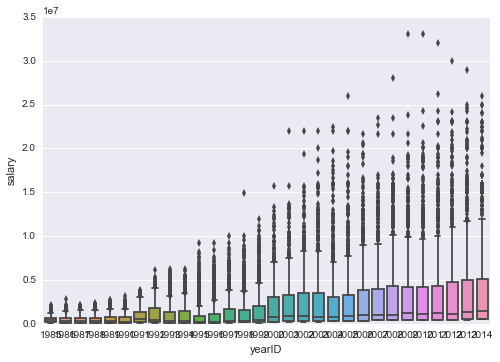

In [294]:
ax = sb.boxplot(x="yearID", y="salary", data=salary, width=0.75)

#### Limitations and further study
Clearly players are making a lot more money. There are many different aspects that I could pursue here. The dollar figures could be adjusted for inflation, for starters. I could have looked at salaries by team, by position. I could have looked for relationships between salary and performance. There are many areas that would be interesting.

## Batting
#### Question 5 - Has OPS been increasing for regular players over time?
OPS, a new baseball statistic that is the sum of on-base percentage and slugging percentage, seems to be increasing over time. I've limited the following scatterplot to players with at least 502 plate appearances, the minimum in a regular 162 game season to qualify for a batting title. It's easy to see the strike shortened years by the gaps, where very few players had that many plate appearances.

First I had to do a little work on the batting database. Players who played for more than one team in a season are represented on different lines for each team that they played for. I wanted to combine those lines so that every line represents a single player's full season. I also had to add a few columns in order to calculate OPS.

In [295]:
batting = pd.read_csv('./lahman-csv_2015-01-24/Batting.csv')

# If a player played for two or more teams in a single season he will have multiple lines.
# I wanted to combine those lines so that every line represents the full season played by
# a given player.
batting = batting.groupby(['yearID', 'playerID']).sum()

# put yearID and playerID back as columns, instead of indexes
batting.reset_index(inplace=True)

# some statistics weren't recorded in the old days, so replace the Nan entries with a zero
batting = batting.fillna(0)

# Let's take a look at a few rows to see if everything looks OK.
batting.loc[70005:70010]

       yearID   playerID  stint    G   AB   R   H  2B  3B  HR  RBI  SB  CS  \
70005    1996  timmooz01      1   65  140  18  28   4   0   7   16   1   0   
70006    1996  tinslle01      3  123  244  29  54   6   1   3   16   8  12   
70007    1996  tombean01      1   63   66  12  17   4   0   3   10   0   0   
70008    1996  torresa01      1   10    0   0   0   0   0   0    0   0   0   
70009    1996  trachst01      1   31   66   3   7   2   0   1    5   0   0   
70010    1996  trammal01      1   66  193  16  45   2   0   1   16   6   0   

       BB  SO  IBB  HBP  SH  SF  GIDP  
70005  15  30    0    1   1   0     1  
70006  17  78    0    2   2   1     6  
70007   9  27    0    1   0   0     0  
70008   0   0    0    0   0   0     0  
70009   1  20    0    0   6   0     0  
70010  10  27    0    0   1   3     3  

In [296]:
# Let's add a column for Plate Appearances.
batting['PA'] = batting.AB + batting.BB + batting.HBP + batting.SH + batting.SF

# And a column for On Base Percentage.
batting['OBP'] = (batting.H + batting.BB + batting.HBP) / (batting.AB + batting.BB + batting.HBP + batting.SF)

# And a column for total bases. Note: because the H column includes extra base hits
# the formula looks a bit different than normally written.
batting['TB'] = batting.H + batting['2B'] + batting['3B'] * 2 + batting.HR * 3

# And a column for Slugging Percentage.
batting['SLG'] = batting.TB / batting.AB

# And finally a column for OPS.
batting['OPS'] = batting.OBP + batting.SLG

# Babe Ruth and Barry Bonds are the only players with an OPS greater than 1.3 and
# more than 502 plate appearances. Each did it three times.
batting[batting.OPS > 1.3][batting.PA >= 502]

       yearID   playerID  stint    G   AB    R    H  2B  3B  HR  RBI  \
17072    1920   ruthba01      1  142  457  158  172  36   9  54  137   
17563    1921   ruthba01      1  152  540  177  204  44  16  59  171   
18586    1923   ruthba01      1  152  522  151  205  45  13  41  131   
74976    2001  bondsba01      1  153  476  129  156  32   2  73  137   
76192    2002  bondsba01      1  143  403  117  149  31   2  46  110   
78646    2004  bondsba01      1  147  373  129  135  27   3  45  101   

         ...     SO  IBB  HBP  SH  SF  GIDP   PA       OBP   TB       SLG  \
17072    ...     80    0    3   5   0     0  615  0.532787  388  0.849015   
17563    ...     81    0    4   4   0     0  693  0.512337  457  0.846296   
18586    ...     93    0    4   3   0     0  699  0.544540  399  0.764368   
74976    ...     93   35    9   0   2     5  664  0.515060  411  0.863445   
76192    ...     47   68    9   0   2     4  612  0.581699  322  0.799007   
78646    ...     41  120    9   0

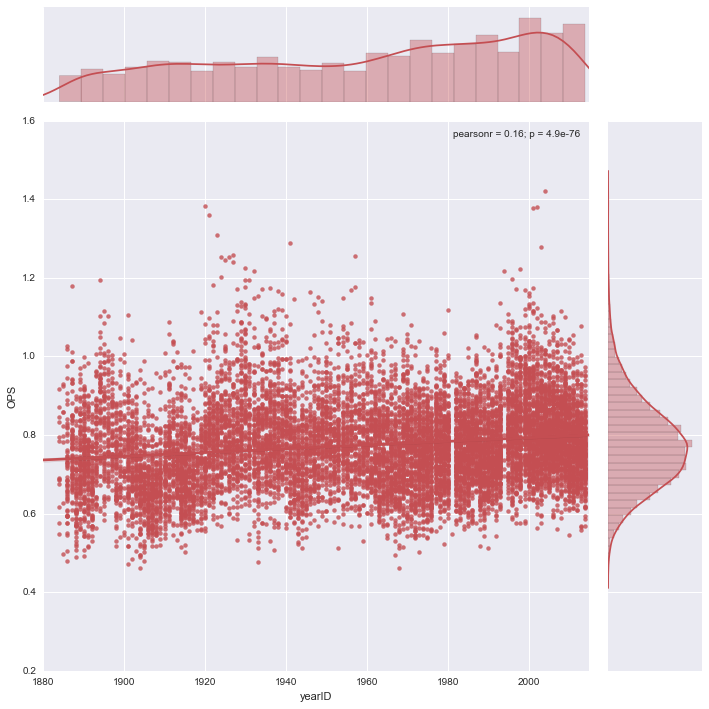

In [297]:
batting_eligible = batting[batting.PA >= 502]
sb.set(style="darkgrid", color_codes=True)
sb.jointplot("yearID", "OPS", data=batting_eligible, kind="reg",
                    xlim=(1880, 2015), color="r", size=10)

#### Limitations and further study
Rather than look at the trend in OPS for players with sufficient plate appearances to qualify for a batting title I could have looked at an aggregate OPS by team or league over time. There are many possible interesting relationships to explore with OPS. I could have looked at salary vs. OPS, or age of player vs. OPS. Again, there are numerous possibilities.

## Handedness
#### Question 6 - Are lefties really better hitters than righties?
Let's compare the batting averages of left-handed hitters vs. right-handed hitters. I'll ignore switch hitters as I don't have any data about their performance from either side of the plate. I'll use OPS instead of straight batting average to compare the two groups. To make it a bit more straightforward I'll only look at the batters since 1940, and limit it to batters with at least 502 plate appearances.

In [298]:
# take the handedness from 'master' (right refers to the right table)
right = master[['playerID', 'bats']]
# take the batting stats from 'batting' (left refers to the left table)
left = batting[['playerID', 'yearID', 'PA', 'OPS']]
# join the data to create a single data frame with the required columns
mg = pd.merge(left, right, how='inner', on='playerID', left_index=True)
# limit the players to 1940 and beyond
mg = mg[mg.yearID >= 1940]
# limit the players to 502+ plate appearances (min. needed to be eligible for batting title)
mg = mg[mg.PA >= 502]
# separate the data for lefties and righties
lefties = mg[mg.bats == 'L']
righties = mg[mg.bats == 'R']

The OPS of lefties is slightly better than that of righties for players from 1940 on who made at least 502 plate appearances. I performed a [Mann-Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) to see if the difference was significant. The result of the test allows me to reject a null hypothesis that the means of the two underlying populations are the same at a 95% confidence level (the p-value is actually exceptionally small).

In [299]:
print "Lefties  OPS (mean & std. deviation):", lefties.OPS.mean(), lefties.OPS.std()
print "Righties OPS (mean & std. deviation):", righties.OPS.mean(), righties.OPS.std()
s, p = stats.mannwhitneyu(lefties.OPS, righties.OPS)
print "U-statistic:", s
print "p-value:", p

Lefties  OPS (mean & std. deviation): 0.804009214318 0.101090808191
Righties OPS (mean & std. deviation): 0.775324798009 0.102249015591
U-statistic: 7221470.5
p-value: 2.14616123355e-29


#### Limitations and further study
Based on this result I don't think that it's possible to make the claim that left-handed hitters are better than right-handed hitters since there is a pronounced difference in a hitter's performance facing a right-handed pitcher vs. a left-handed pitcher. Ideally, I would need data showing all four possible matchups (rightie vs. rightie, rightie vs. leftie, leftie vs. rightie, leftie vs. leftie). The Lahman data doesn't have that level of granularity. As with the previous section, one approach I could have taken would have been to take a look at all leftie at bats and compare that with all rightie at bats. 

## Run differential and wins
#### Question 7 - Can a team's total wins be predicted by run differential?
Sports writers like to focus on run differential to determine whether a team is under-performing or over-performing. Let's see what's going on. I'll limit my exploration to the National League teams from 1920 on (the so-called "live ball era"). The goal is to come up with a linear model to predict the number of wins a team should get based on run differential. For the independent variable I'm going to use the actual run differential divided by the number of games (to normalize for shorter seasons). The dependent variable will be similarly normalized and so will actually be winning percentage.

In [300]:
teams = pd.read_csv('./lahman-csv_2015-01-24/Teams.csv')
teams['rundiff'] = (teams.R - teams.RA) / teams.G
teams['winpercent'] = teams.W / teams.G
NLteams = teams[teams.lgID == 'NL']
NLteams = NLteams[NLteams.yearID >= 1920]

In [301]:
# I wanted to try out a different Ordinary Least Squares implementation.
# The following code was suggested in a StackOverflow discussion to deal
# with multiple x-values. Initially that's what I had in mind, but I adapted
# it to work with a single column of x-values.

import statsmodels.api as sm

y = NLteams.winpercent

x = [NLteams.rundiff]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

In [302]:
print reg_m(y, x).summary()

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     7404.
Date:                Sat, 27 Feb 2016   Prob (F-statistic):               0.00
Time:                        22:32:03   Log-Likelihood:                 2285.1
No. Observations:                1034   AIC:                            -4566.
Df Residuals:                    1032   BIC:                            -4556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1037      0.001     86.046      0.0

The t-values for both coefficients are very large and the corresponding p-values are essentially zero. The R-squared is 0.878. So, we could say that run differential accounts for 87.8% of the variation in winning percentage. This isn't too surprising since in baseball to win a team needs to score more runs than it allows.

Based on these results we could come up with a model to predict the number of wins that a team should get based on their run differential. The equation would be:

$\frac { W }{ G } \quad =\quad 0.1037\left( \frac { RS-RA }{ G }  \right) +0.4989\quad\quad\quad\quad\quad$

Currently the season is 162 games long. Multiplying both sides of this equation by 162 gives the following equation:

$W\quad =\quad 0.1037\left( RS-RA \right)  + 80.8218\quad\quad\quad\quad\quad$

Let's see how well this matched the National League 2015 season.
<table align="left">
<tr>
<td></td><td>W</td><td>L</td><td>RS</td><td>RA</td><td>RS-RA</td><td>pred</td><td>W-pred</td>
</tr>
<tr>
<td>St. Louis Cardinals</td><td>100</td><td>62</td><td>647</td><td>525</td><td>122</td><td>93.5</td><td>6.5</td>
</tr>
<tr>
<td>Pittsburgh Pirates</td><td>98</td><td>64</td><td>697</td><td>596</td><td>101</td><td>91.3</td><td>6.7</td>
</tr>
<tr>
<td>Chicago Cubs</td><td>97</td><td>65</td><td>689</td><td>608</td><td>81</td><td>89.2</td><td>7.8</td>
</tr>
<tr>
<td>LA Dodgers</td><td>92</td><td>70</td><td>667</td><td>595</td><td>72</td><td>88.3</td><td>3.7</td>
</tr>
<tr>
<td>NY Mets</td><td>90</td><td>72</td><td>683</td><td>613</td><td>70</td><td>88.1</td><td>1.9</td>
</tr>
<tr>
<td>SF Giants</td><td>84</td><td>78</td><td>696</td><td>627</td><td>69</td><td>88.0</td><td>-4.0</td>
</tr>
<tr>
<td>Washington Nationals</td><td>83</td><td>79</td><td>703</td><td>635</td><td>68</td><td>87.9</td><td>-4.9</td>
</tr>
<tr>
<td>Arizona Diamondbacks</td><td>79</td><td>83</td><td>720</td><td>713</td><td>7</td><td>81.5</td><td>-2.5</td>
</tr>
<tr>
<td>San Diego Padres</td><td>74</td><td>88</td><td>650</td><td>731</td><td>-81</td><td>72.4</td><td>1.6</td>
</tr>
<tr>
<td>Miami Marlins</td><td>71</td><td>91</td><td>613</td><td>678</td><td>-65</td><td>74.1</td><td>-3.1</td>
</tr>
<tr>
<td>Colorado Rockies</td><td>68</td><td>94</td><td>737</td><td>844</td><td>-107</td><td>69.7</td><td>-1.7</td>
</tr>
<tr>
<td>Milwaukee Brewers</td><td>68</td><td>94</td><td>655</td><td>737</td><td>-82</td><td>72.3</td><td>-4.3</td>
</tr>
<tr>
<td>Atlanta Braves</td><td>67</td><td>95</td><td>573</td><td>760</td><td>-187</td><td>61.4</td><td>5.6</td>
</tr>
<tr>
<td>Cincinnati Reds</td><td>64</td><td>98</td><td>640</td><td>754</td><td>-114</td><td>69.0</td><td>-5.0</td>
</tr>
<tr>
<td>Philadelphia Phillies</td><td>63</td><td>99</td><td>626</td><td>809</td><td>-183</td><td>61.8</td><td>1.2</td>
</tr>
</table>

#### Limitations and further study
Of course, it's not a perfect match. At the extremes, the Cubs won 7.8 more games than the model predicted and the Reds lost 5.0 more games than the model predicted. One way to think about the difference between the actual number of wins and the predicted number of wins is to characterize the team as lucky or not. If you view run production as a stochastic process then obviously teams with higher run differentials will win more games, but to exceed the prediction means that the team must have won some very close games or, alternatively, lost a few very lopsided games.

Options for further study are numerous. For instance I could include additional variables such as salary or team OPS to see if a better model could be developed.